<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Sequence Modeling</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

In [7]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

np.random.seed(123)

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [8]:
%watermark

Last updated: 2024-11-26T23:55:43.227880-05:00

Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.27.0

Compiler    : MSC v.1940 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [9]:
# plt.style.use('seaborn')
plt.style.use("seaborn-v0_8")

# IMDB Dataset 

In [10]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "UNUSED"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
X_train = keras.utils.pad_sequences(X_train, maxlen=max_words)
X_test = keras.utils.pad_sequences(X_test, maxlen=max_words)
print(X_test)
print(X_train)

[[   0    0    0 ...   14    6  717]
 [   0    0    0 ...  125    4 3077]
 [  33    6   58 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846 5518]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


# SimpleRNN Model 

In [12]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 170ms/step - accuracy: 0.5670 - loss: 0.6722 - val_accuracy: 0.7868 - val_loss: 0.4600
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 164ms/step - accuracy: 0.8369 - loss: 0.3854 - val_accuracy: 0.8465 - val_loss: 0.3648
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.8955 - loss: 0.2760 - val_accuracy: 0.8480 - val_loss: 0.3671
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 147ms/step - accuracy: 0.9516 - loss: 0.1458 - val_accuracy: 0.8425 - val_loss: 0.4753
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.9702 - loss: 0.0966 - val_accuracy: 0.8374 - val_loss: 0.4569
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 177ms/step - accuracy: 0.9892 - loss: 0.0426 - val_accuracy: 0.8434 - val_loss: 0.5172
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.9949 - loss: 0.0240 - val_accuracy: 0.7824 - val_loss: 0.6730
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.9960 - loss: 0

In [15]:
def plot_history(history):
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)
    
    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')    
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')    
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    
    fig.tight_layout()

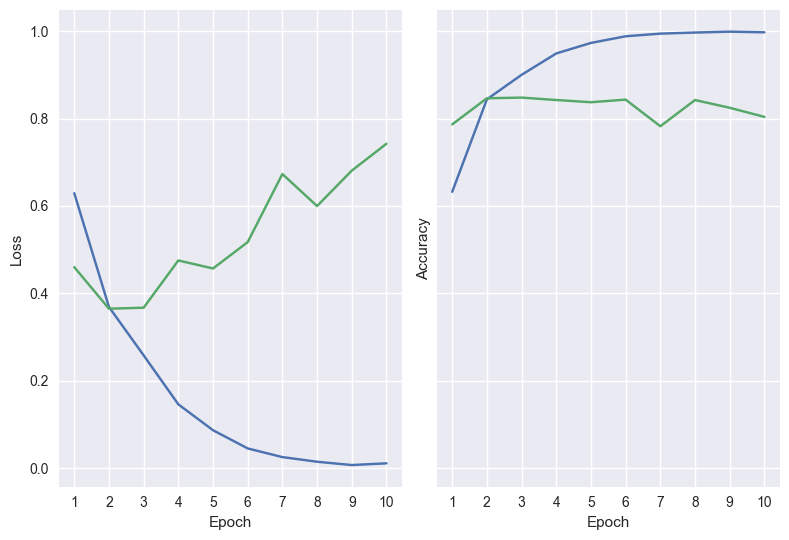

In [16]:
plot_history(history)

# GRU

In [17]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, max_words))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,369 (1.24 MB)

 Trainable params: 326,369 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 392ms/step - accuracy: 0.6184 - loss: 0.6341 - val_accuracy: 0.8480 - val_loss: 0.3529
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 78s 397ms/step - accuracy: 0.8782 - loss: 0.2965 - val_accuracy: 0.8481 - val_loss: 0.3565
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 414ms/step - accuracy: 0.9188 - loss: 0.2163 - val_accuracy: 0.8624 - val_loss: 0.3256
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 77s 392ms/step - accuracy: 0.9323 - loss: 0.1823 - val_accuracy: 0.8433 - val_loss: 0.4066
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 76s 389ms/step - accuracy: 0.9451 - loss: 0.1527 - val_accuracy: 0.8621 - val_loss: 0.3521
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 342ms/step - accuracy: 0.9581 - loss: 0.1228 - val_accuracy: 0.8540 - val_loss: 0.3768
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 341ms/step - accuracy: 0.9609 - loss: 0.1159 - val_accuracy: 0.8534 - val_loss: 0.4078
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 338ms/step - accuracy: 0.9676 - loss: 0

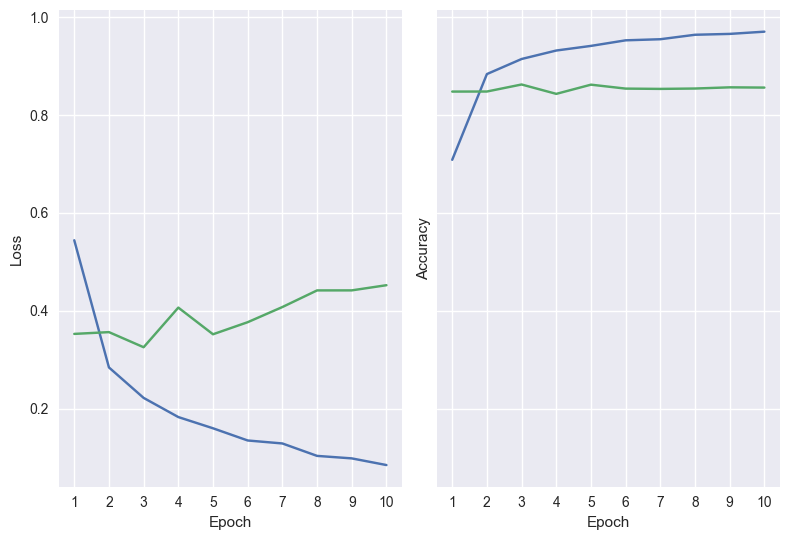

In [20]:
plot_history(history)

# LSTM

In [21]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, max_words))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 72s 343ms/step - accuracy: 0.6837 - loss: 0.5823 - val_accuracy: 0.8360 - val_loss: 0.3782
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 332ms/step - accuracy: 0.8955 - loss: 0.2724 - val_accuracy: 0.8688 - val_loss: 0.3141
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 75s 386ms/step - accuracy: 0.9316 - loss: 0.1937 - val_accuracy: 0.8758 - val_loss: 0.2975
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 359ms/step - accuracy: 0.9487 - loss: 0.1482 - val_accuracy: 0.8682 - val_loss: 0.3207
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 335ms/step - accuracy: 0.9448 - loss: 0.1582 - val_accuracy: 0.8718 - val_loss: 0.3719
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 84s 346ms/step - accuracy: 0.9619 - loss: 0.1133 - val_accuracy: 0.8712 - val_loss: 0.3688
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 380ms/step - accuracy: 0.9718 - loss: 0.0865 - val_accuracy: 0.8661 - val_loss: 0.4456
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 377ms/step - accuracy: 0.9761 - loss: 0

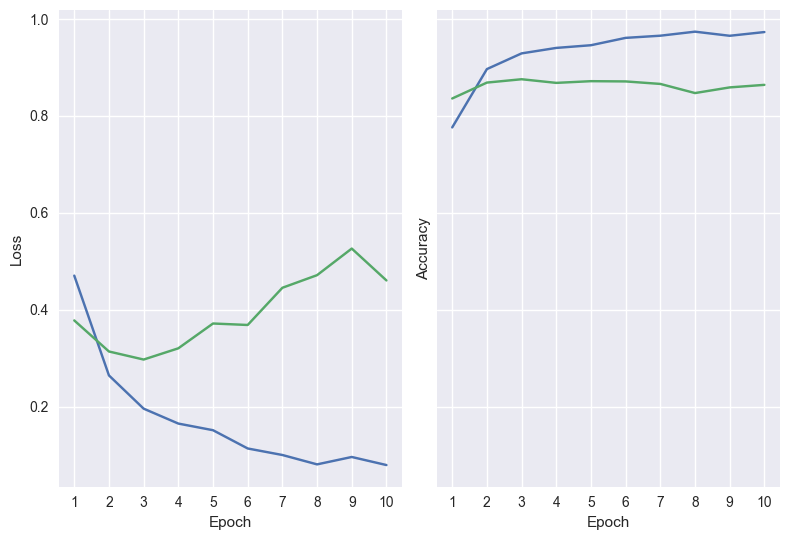

In [24]:
plot_history(history)